<a href="https://colab.research.google.com/github/hewan00/visualization_assignment/blob/main/visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas
%pip install fastparquet
%pip install pandas xlrd
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install statsmodels
#python tools neededd


In [ ]:
!git clone https://github.com/ds3001f25/visualization_assignment.git

fatal: destination path 'visualization_assignment' already exists and is not an empty directory.


In [ ]:
import pandas as pd

df = pd.read_csv("visualization_assignment/data/college_completion.csv")
df.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


# Q1: Kernel Density Plot Function

- Write your own function to make a kernel density plot.
- The user should pass in a Pandas Series or Numpy array.
- Default kernel: Gaussian (include uniform/bump and Epanechnikov as alternatives).
- Default bandwidth: Silverman plug-in (allow user to specify another).
- Use Matplotlib or Seaborn's `.lineplot`, but **do not** use existing KDE functions.

Tip: Consider using `pdist` or `cdist` from SciPy or NumPy broadcasting to calculate distances. Loops are fine but slower.

You will test your function on the `penguins` dataset or the pretrial dataset from class.


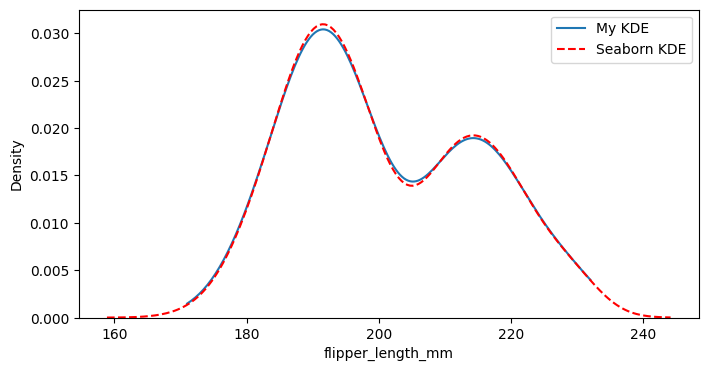

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

# Kernel function
def kernel_function(z, kernel="gaussian"):
    if kernel == "gaussian":
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
    elif kernel == "uniform":
        return 0.5 * np.where(np.abs(z) <= 1, 1, 0)
    elif kernel == "epanechnikov":
        return 0.75 * (1 - z**2) * np.where(np.abs(z) <= 1, 1, 0)
    else:
        raise ValueError("Invalid kernel type. Choose 'gaussian', 'uniform', or 'epanechnikov'.")

# Bandwidth function
def get_bandwidth(data, bandwidth="silverman"):
    n = len(data)
    std = np.std(data, ddof=1)
    if bandwidth == "silverman":
        return 1.06 * std * n ** (-1/5)
    elif isinstance(bandwidth, (int, float)) and bandwidth > 0:
        return bandwidth
    else:
        raise ValueError("Invalid bandwidth. Use 'silverman' or a positive number.")

# Custom KDE function
def my_kde(data, kernel="gaussian", bandwidth="silverman", x_grid=None):
    data = np.asarray(data)
    n = len(data)
    h = get_bandwidth(data, bandwidth)

    if x_grid is None:
        x_grid = np.linspace(data.min() - 1, data.max() + 1, 200)

    distances = (x_grid[:, None] - data[None, :]) / h
    kernel_vals = kernel_function(distances, kernel)
    densities = kernel_vals.mean(axis=1) / h
    return x_grid, densities

# Test your KDE function
data = sns.load_dataset("penguins")["flipper_length_mm"].dropna()
x, dens = my_kde(data)
plt.figure(figsize=(8, 4))
sns.lineplot(x=x, y=dens, label="My KDE")
sns.kdeplot(data, label="Seaborn KDE", color="red", linestyle="--")
plt.legend()
plt.show()



# Q2 Observations / Notes

- We’re looking at colleges and their graduation rates and aid.
- Key variables:
    - `level` → whether the school is 2-year or 4-year.
    - `control` → type of school: public, private non-profit, or private for-profit.
    - `grad_100_value` → graduation rate in normal time.
    - `aid_value` → average student aid per student.
- First step is just loading the data to make sure it worked.
- Using `df.head()` is peeking at the first 5 rows of a spreadsheet to make sure nothing looks broken or weird
- Using `df.shape` is counting how many rows (schools) and columns (data points) we have.


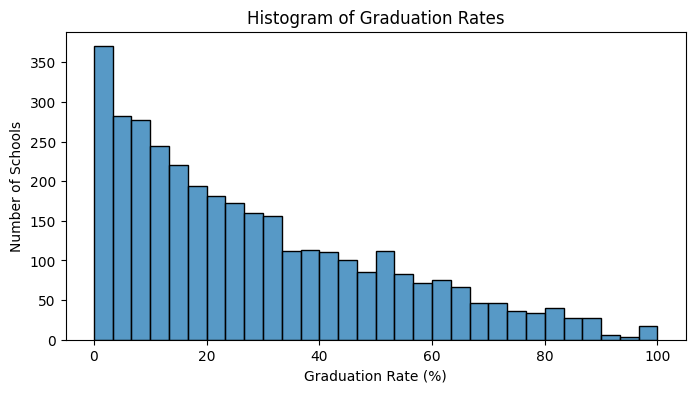

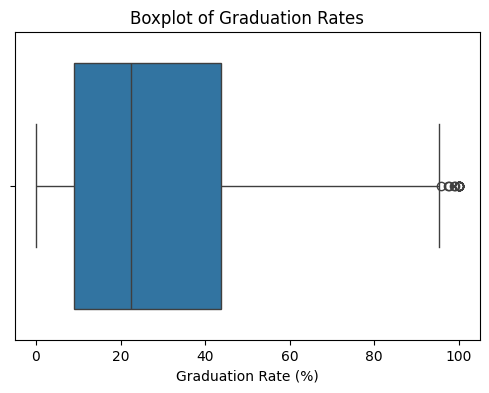

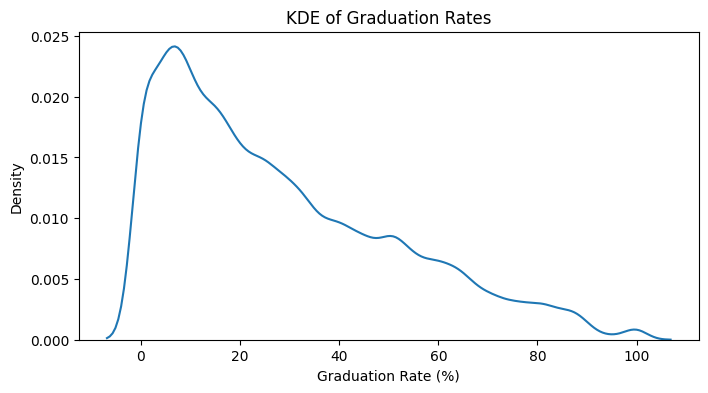

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [ ]:
# Step 4: Quick look at graduation rates
grad = df["grad_100_value"].dropna()  # drop missing values so plots work

# Histogram → shows how many schools fall into each graduation rate range
plt.figure(figsize=(8,4))
sns.histplot(grad, bins=30, kde=False)
plt.title("Histogram of Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Number of Schools")
plt.show()

# Boxplot → shows distribution, median, and outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=grad)
plt.title("Boxplot of Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Kernel Density Estimate (KDE) → smooth curve of graduation rates
plt.figure(figsize=(8,4))
sns.kdeplot(grad, bw_adjust=0.5)
plt.title("KDE of Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

# Quick statistics
print(grad.describe())


# Step 6 Notes / Explanations

- `grad = df["grad_100_value"].dropna()` →  only want the schools that have a graduation rate number. If it's missing, the code ignores it.
- Histogram → counts how many schools have graduation rates in different ranges (0–10%, 10–20%, etc.).
- Boxplot → shows the middle (median), spread (quartiles), and any unusually high/low schools (outliers).
- KDE → smooth curve showing where most schools’ graduation rates are concentrated. Think of it like a "smoothed histogram."
- `grad.describe()` → shows key stats: average (mean), middle (median), spread (std), min, max, quartiles.


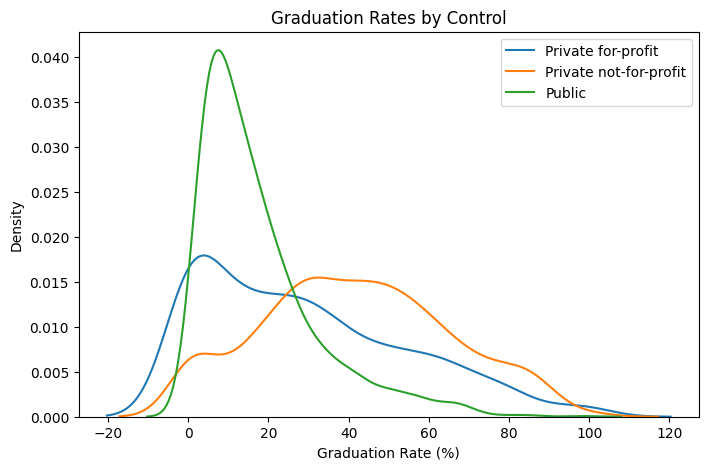

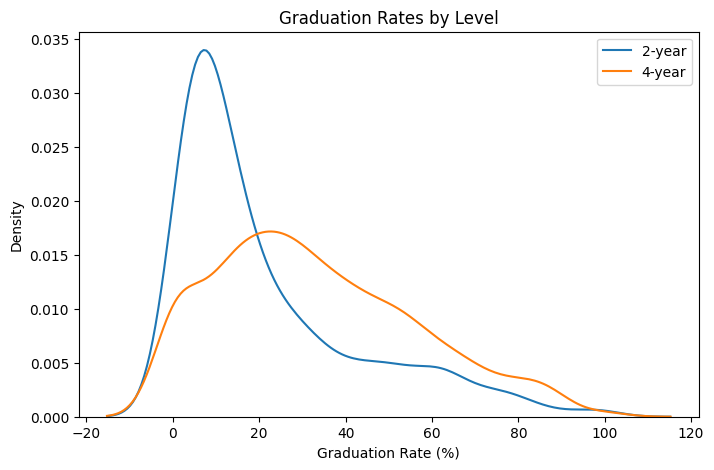

In [ ]:
# Step 5: Grouped KDE by control type
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("control"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Control")
plt.xlabel("Graduation Rate (%)")
plt.legend()
plt.show()

# Grouped KDE by level (2-year vs 4-year)
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("level"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Level")
plt.xlabel("Graduation Rate (%)")
plt.legend()
plt.show()


- We’re now looking at graduation rates **grouped by school type**.
- `groupby("control")` → splits schools into Public, Private Non-Profit, Private For-Profit.
- `groupby("level")` → splits schools into 2-year and 4-year.
- Each line on the KDE graph shows where schools in that group fall in graduation rates.
- This helps us see which groups tend to graduate more students on time.


In [ ]:
# Step 7: Create a new column combining level and control
df["levelXcontrol"] = df["level"] + ", " + df["control"]

# Check that it worked
df[["level", "control", "levelXcontrol"]].head()


,level,control,levelXcontrol
0,4-year,Public,"4-year, Public"
1,4-year,Public,"4-year, Public"
2,4-year,Private not-for-profit,"4-year, Private not-for-profit"
3,4-year,Public,"4-year, Public"
4,4-year,Public,"4-year, Public"


it combines the level (2-year or 4-year) with control (Public, Private, etc.) into a single column.
Example: "4-year, Public" or "2-year, Private Non-Profit".
# The .head() part just shows the first 5 rows to make sure it works

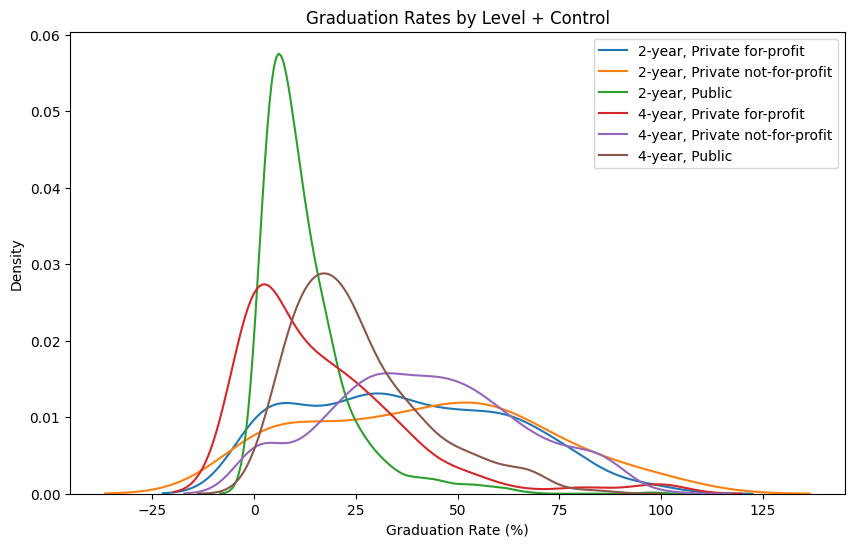

In [ ]:
# Step 7: KDE plot by combined level and control
plt.figure(figsize=(10,6))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("levelXcontrol"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Level + Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.legend()
plt.show()
##looking at graduation rates **considering both level and control together**.
##Each line represents a specific group like "4-year, Public" or "2-year, Private Non-Profit."
##This graph helps us see **which exact types of schools tend to have higher graduation rates**.
##The tallest part of each curve → where most schools in that group fall.
##If a curve is shifted to the right → that group generally has higher graduation rates.



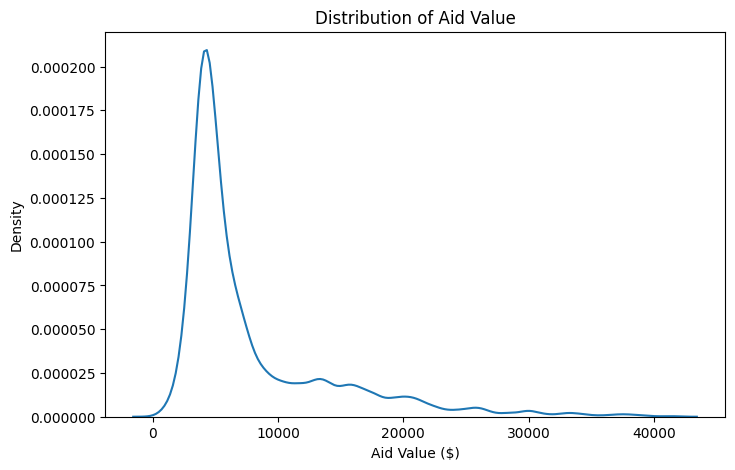

In [ ]:
# Step 8a: KDE plot for aid_value
plt.figure(figsize=(8,5))
sns.kdeplot(df["aid_value"].dropna(), bw_adjust=0.5)
plt.title("Distribution of Aid Value")
plt.xlabel("Aid Value ($)")
plt.ylabel("Density")
plt.show()

##This plot shows **how aid is distributed across all schools**.
##The peak of the curve = the most common aid value.
##Wider curves = more variation in aid.



**aid_value = the average amount of financial aid students get.**
**dropna() just removes empty/missing values so it won’t crash.**
**KDE plot = smooth curve that shows how common different aid amounts are.**
**b,w_adjust=0.5 makes the curve a bit smoother or sharper.**

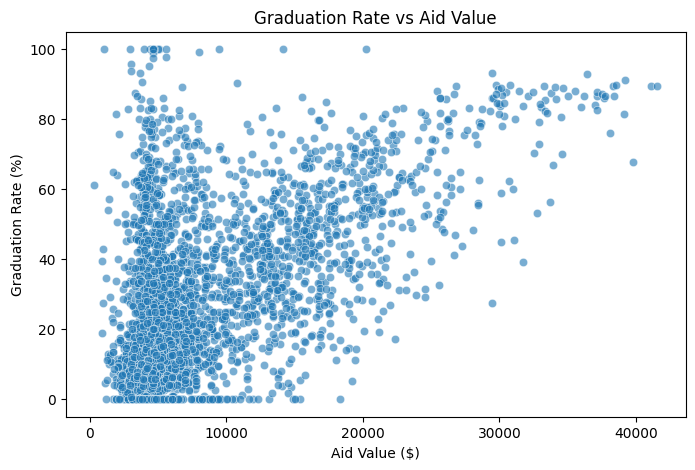

In [ ]:
# Step 8b: Scatterplot of Graduation Rate vs Aid
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", alpha=0.6)
plt.title("Graduation Rate vs Aid Value")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)"
plt.show()


##Each dot = one school.
##X-axis = how much aid students get.
##Y-axis = graduation rate.
##alpha=0.6 makes dots slightly transparent so overlapping dots are visible.

- This shows **whether more aid is associated with higher graduation rates**.
- If dots slope upwards → schools giving more aid tend to have higher graduation.
- If dots are scattered flat → aid might not affect graduation.


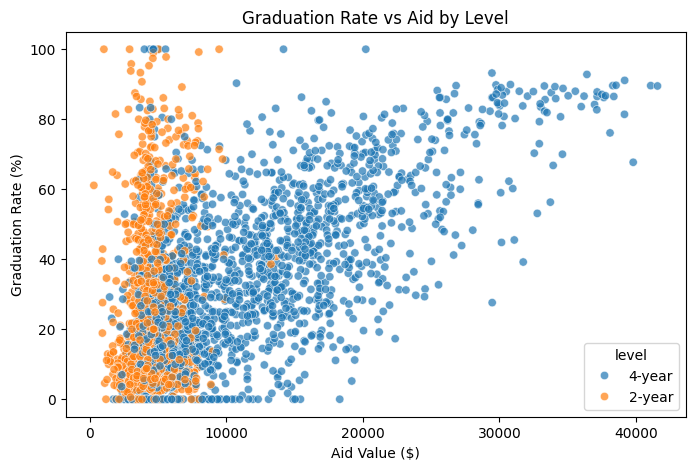

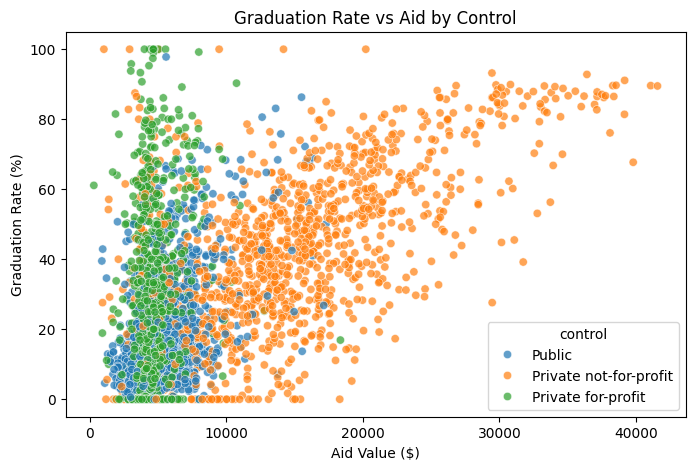

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level", alpha=0.7)
plt.title("Graduation Ratvs Aid by Level")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control", alpha=0.7)
plt.title("Graduation Rate vs Aid by Control")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()


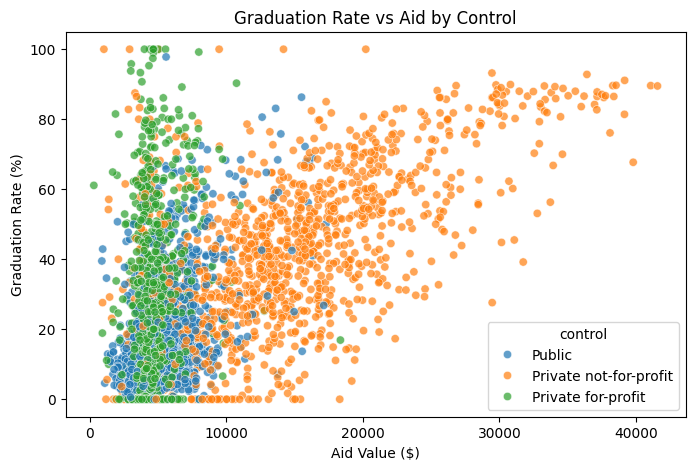

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control", alpha=0.7)
plt.title("Graduation Rate vs Aid by Control")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%))
plt.show()


- Coloring dots by **level** or **control** lets us see patterns by school type.
- Some groups may show strong positive trends (more aid → higher graduation), others may not.
- This helps understand **which kinds of schools benefit most from extra aid**.
